# Step 1 making the structure using ASE

In [1]:
import ase
import ase.spacegroup
from ase.spacegroup import crystal
from ase.visualize import view
from ase.io import write


import numpy as np
%matplotlib notebook

Step 1. Specify the lattice constants of the crystal you wish to build
Step 2. Specify the basis postions of the atoms in the cell, if multiple elements are present in crystal multiple basis positions are required.
step 3. Using space group list the elements in your crystal, basis positon of elements, spacegroup no. (this is the crystal group), include the cell parameters and the angles of the cell.
step 4. Apply a vacuum to the cell and centre the crystal within. This can also be done in the ASE GUI. (Note, if you repeat the structure after applying the vacuum this can create some funky repeats of the pirimitive cell)

In [2]:
#lattice constants
a = 3.92
b = 3.92
c = 3.92



basis_positions = [(0, 0, 0)]

pd_crystal = ase.spacegroup.crystal(['Pd' ],
                                basis=basis_positions,
                                spacegroup=225,
                                cellpar=[a, a, c, 90, 90, 90],
                                )

#Running <.repeat> is not necessary if using wulffpack as no. of atoms will be specified in wulffpack
pd_crystal_repeat=pd_crystal.repeat((5, 5, 3))

pd_crystal_repeat.center(vacuum=10, axis=(0,1,2))

In [3]:
view(pd_crystal)
view(pd_crystal_repeat)

<Popen: returncode: None args: ['C:\\Users\\Joshu\\anaconda3\\envs\\myenv\\p...>

# Step 2 using the surface energies to make a wulffconstruct

Step 1. import wulffpack and the appropriate tool to create the crystal (i.e singlecrystal, winterbottom, decahedral etc). 
Step 2. specify the primitive structure as the none repeated structure generated with ASE.
Step 3. Specifiy the crystal surface energies. These energies will be able to generate a wulff construct of those energies and apply them to the ASE structure. The unit of energy is not important here as the construct is generated from the ratio of energies example of how to input energy (millar plane): surface energy =  (1, 1, 1): 2.2
Step 4.Run single scrystal including the surface energies, primitive structure and natoms (desired no. atoms for final structure)

In [4]:
import wulffpack as wp
from wulffpack import (SingleCrystal)

<IPython.core.display.Javascript object>


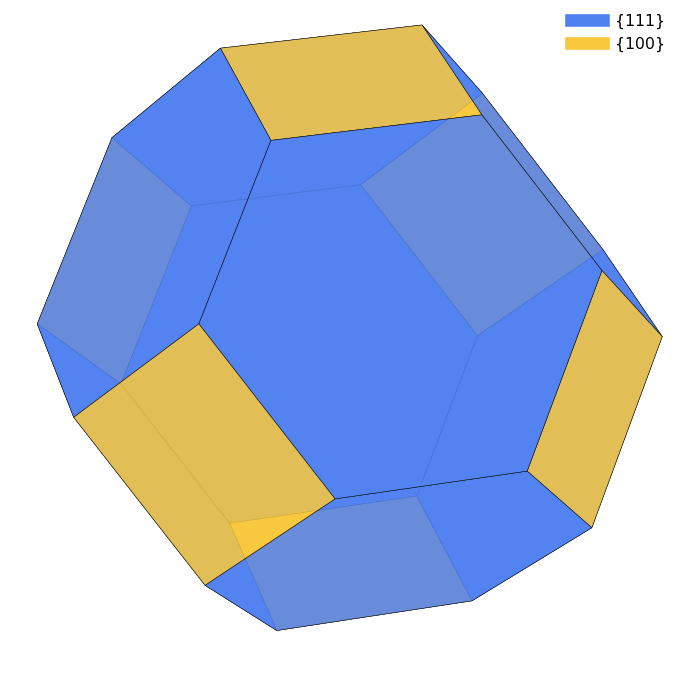

In [5]:
prim = pd_crystal
surface_energies = {(1, 1, 1): 2.2,
                    (1, 0, 0): 2.5,
                    (1, 1, 0): 2.8}


particle = SingleCrystal(surface_energies,
                         primitive_structure=prim,
                         natoms=500)

particle.view()




In [6]:
#Wulffconstruct can be saved as such

write('Pd_nanoparticle_225_wulff.cfg', particle.atoms)